In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df = pd.read_csv("dataset_prediksi_harga_beras_final.csv")

In [4]:
df.head()

,Kabupaten,Tahun,Luas_Lahan_Padi_(Ha),Produktivitas_Tanaman_Padi_(Ku/ha),Produksi_Padi_(Ton),Konsumsi_Beras,Rata_Rata_Harga_Beras
0,Bogor,2022,56002.23,53.55,299893.80,1.613,9770
1,Sukabumi,2022,95012.99,53.49,508220.48,1.938,9903
2,Cianjur,2022,115877.18,53.33,617941.03,1.959,11206
3,Bandung,2022,47537.79,60.84,289205.70,1.465,10786
4,Garut,2022,75951.04,58.11,441316.20,1.592,10726


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 7 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Kabupaten                           54 non-null     object 
 1   Tahun                               54 non-null     int64  
 2   Luas_Lahan_Padi_(Ha)                54 non-null     float64
 3   Produktivitas_Tanaman_Padi_(Ku/ha)  54 non-null     float64
 4   Produksi_Padi_(Ton)                 54 non-null     float64
 5   Konsumsi_Beras                      54 non-null     float64
 6   Rata_Rata_Harga_Beras               54 non-null     int64  
dtypes: float64(4), int64(2), object(1)
memory usage: 3.1+ KB


In [6]:
# 2. Encode kolom kategori

df_encoded = pd.get_dummies(df, columns=['Kabupaten'], drop_first=True)

In [7]:
# 3. Pisahkan fitur & target

X = df_encoded.drop('Rata_Rata_Harga_Beras', axis=1)
y = df_encoded['Rata_Rata_Harga_Beras']

In [8]:
# 4. Train-test split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

In [9]:
# 5. Standarisasi

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# 6. Training model
# =======================
model = LinearRegression()
model.fit(X_train_scaled, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [11]:
# 7. Prediksi

y_pred = model.predict(X_test_scaled)

In [12]:
# 8. Evaluasi

mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)

MSE : 165159.73321464934
RMSE: 406.39849066482685
R²  : 0.9137151757069727


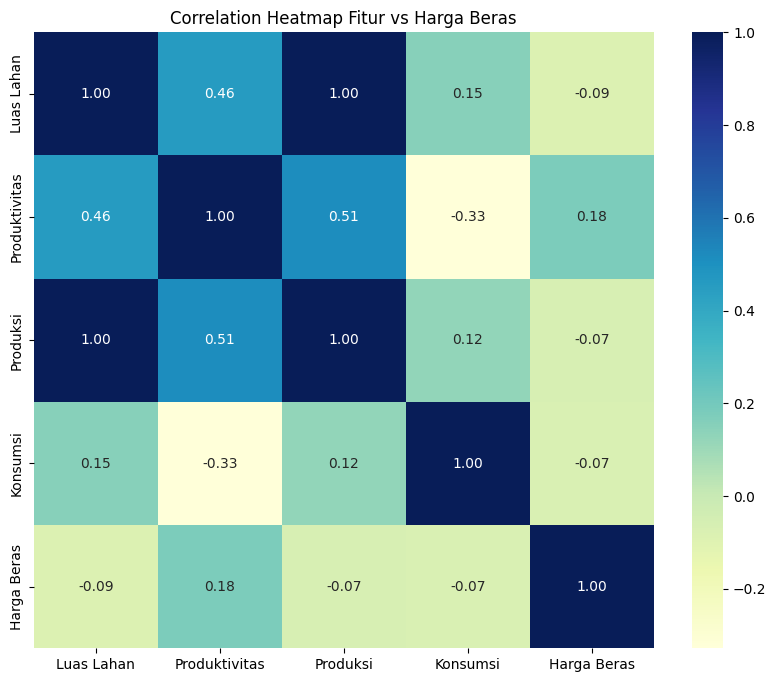

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# ============================
#  CORRELATION HEATMAP
# ============================

# Pilih kolom numerik asli + target
numerical_cols = [
    'Luas_Lahan_Padi_(Ha)',
    'Produktivitas_Tanaman_Padi_(Ku/ha)',
    'Produksi_Padi_(Ton)',
    'Konsumsi_Beras',
    'Rata_Rata_Harga_Beras'
]

# Ambil data numerik dari df
corr_data = df[numerical_cols].corr()

# Mapping nama panjang → pendek
name_map = {
    'Luas_Lahan_Padi_(Ha)': 'Luas Lahan',
    'Produktivitas_Tanaman_Padi_(Ku/ha)': 'Produktivitas',
    'Produksi_Padi_(Ton)': 'Produksi',
    'Konsumsi_Beras': 'Konsumsi',
    'Rata_Rata_Harga_Beras': 'Harga Beras'
}

# Rename baris & kolom
corr_short = corr_data.rename(index=name_map, columns=name_map)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_short, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Correlation Heatmap Fitur vs Harga Beras")
plt.show()


In [14]:
df.head()

,Kabupaten,Tahun,Luas_Lahan_Padi_(Ha),Produktivitas_Tanaman_Padi_(Ku/ha),Produksi_Padi_(Ton),Konsumsi_Beras,Rata_Rata_Harga_Beras
0,Bogor,2022,56002.23,53.55,299893.80,1.613,9770
1,Sukabumi,2022,95012.99,53.49,508220.48,1.938,9903
2,Cianjur,2022,115877.18,53.33,617941.03,1.959,11206
3,Bandung,2022,47537.79,60.84,289205.70,1.465,10786
4,Garut,2022,75951.04,58.11,441316.20,1.592,10726
